In [1]:
"""SCIMPLE 1.10 examples"""

'SCIMPLE 1.10 examples'

In [2]:
import scm.scimple.scimple as scm

In [ ]:
from importlib import reload
reload(scm)

In [3]:
# PySpark
sc, spark = scm.sc_spark()
print(spark)
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [4]:
import re
word_count = sc.textFile('scimple.py').flatMap(lambda line: re.split(r' |:|,|\n|\t|\(|\)|\{|\}|\[|\]|"|\'', line))\
               .filter(lambda word: len(word)!=0)\
               .map(lambda word: (word, 1))\
               .reduceByKey(lambda a,b: a+b).sortBy(lambda pair: pair[1]).collect()

<IPython.core.display.Javascript object>


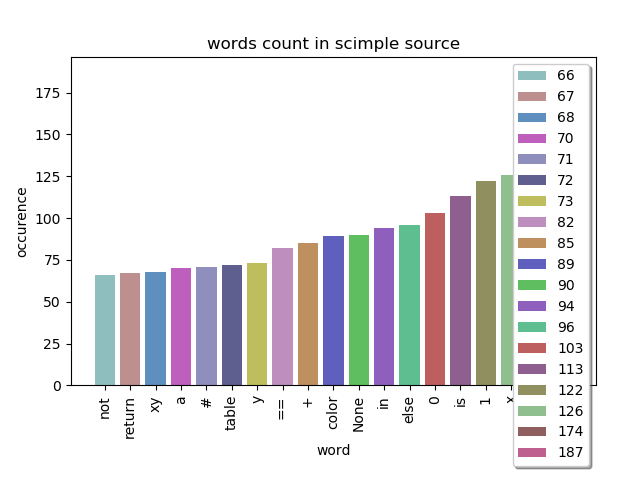

In [5]:
#Data Viz
%matplotlib notebook
scm.Plot(title='words count in scimple source', xlabel='word', ylabel='occurence')\
   .add(word_count[-20:-1], 0, 1, marker='bar', colored_by=1)

In [ ]:
#Kafka
scm.Kafka.start_server(window=5)

['C:/Prog/Python/Scimple/scm/scimple/scimple_data/kafka/bin/windows/zookeeper-server-start.bat', 'C:/Prog/Python/Scimple/scm/scimple/scimple_data/kafka/config/zookeeper.properties']


In [ ]:
dstream = scm.Kafka.create_dstream('source_lines')

In [ ]:
rdd_buff = list()
dstream.foreachRDD(lambda rdd: rdd_buff.append(rdd.collect()))

In [ ]:
scm.Kafka.start_listening()

In [ ]:
import time
for line in open('scimple.py', 'r').read().split('\n'):
    scm.Kafka.talk('source_lines', line)

In [9]:
scm.Kafka.stop_listening()

In [10]:
scm.Kafka.stop_server()

In [18]:
scm.Kafka.flush()

In [11]:
print('\n'.join([key_value[1] for key_value in scm.flatten_n_times(1,rdd_buff)[:20]]))

In [20]:
# Environment to JSON
name = scm.save_environ()
import os
import json
print(json.load(open(name))['PYTHONPATH'])
os.remove(name)

SUCCESS : Path exported in JSON
c:/Prog/Python/MyLibs;C:/Prog/Python/Scimple


<IPython.core.display.Javascript object>


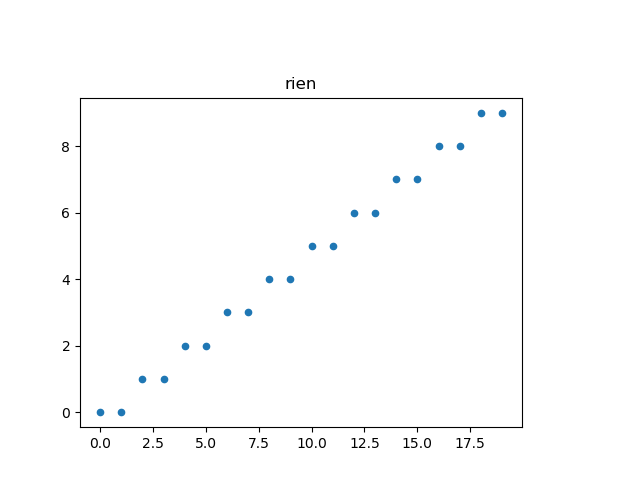

<IPython.core.display.Javascript object>


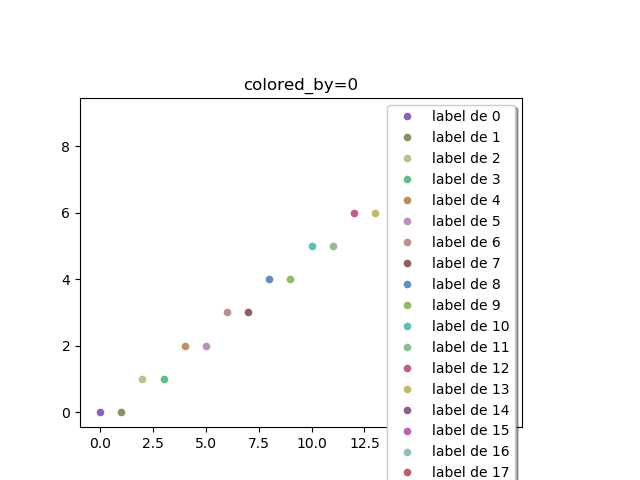

<IPython.core.display.Javascript object>


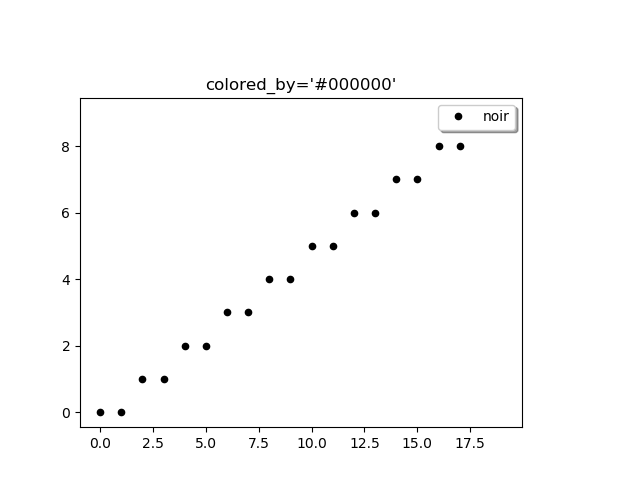

<IPython.core.display.Javascript object>


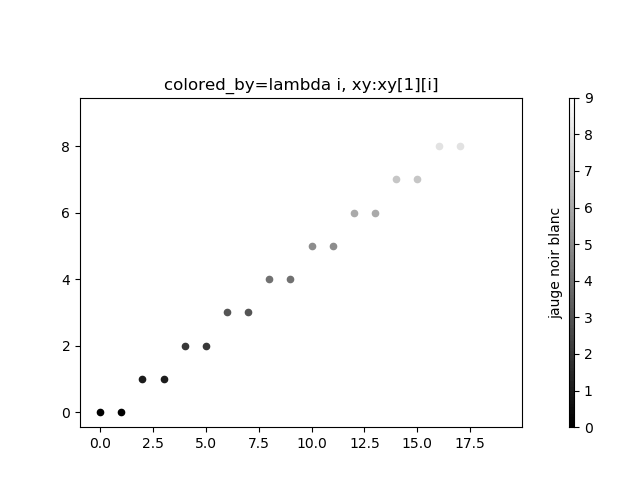

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


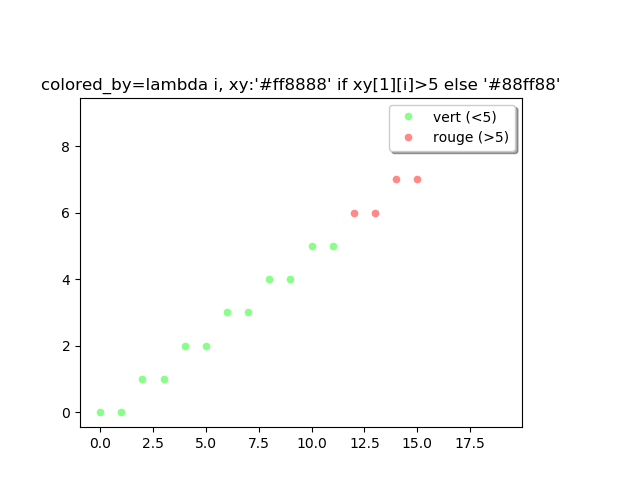

<IPython.core.display.Javascript object>


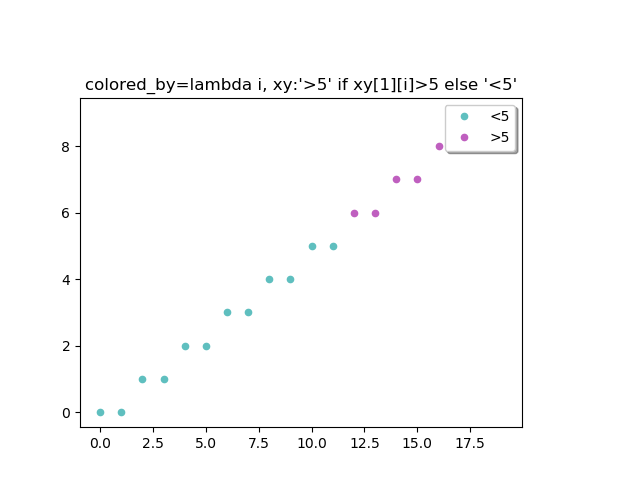

In [13]:
%matplotlib notebook
tab=[[i,i//2] for i in range(20)]
scm.Plot(title="rien").add(tab, 0, 1)
scm.Plot(title="colored_by=0").add(tab, 0, 1, colored_by=0,
                               label={str(i):'label de '+str(i) for i in range(18)})
scm.Plot(title="colored_by='#000000'").add(tab, 0, 1, colored_by='#000000',
                                       label="noir")
scm.Plot(title="colored_by=lambda i, xy:xy[1][i]")\
    .add(tab, 0, 1, colored_by=lambda i, xy:xy[1][i],
         label="jauge noir blanc")
scm.Plot(title="colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88'")\
    .add(tab, 0, 1, colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88',
         label={'#ff8888' :"rouge (>5)", '#88ff88': "vert (<5)"})
scm.Plot(title="colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5'")\
    .add(tab, 0, 1, colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5')

In [26]:
from scimple1.scimple.scimple import Plot, get_sample, xgrid, ygrid
import pandas as pd
import math
import random
tab = get_sample('xyz', pd.DataFrame)


<IPython.core.display.Javascript object>


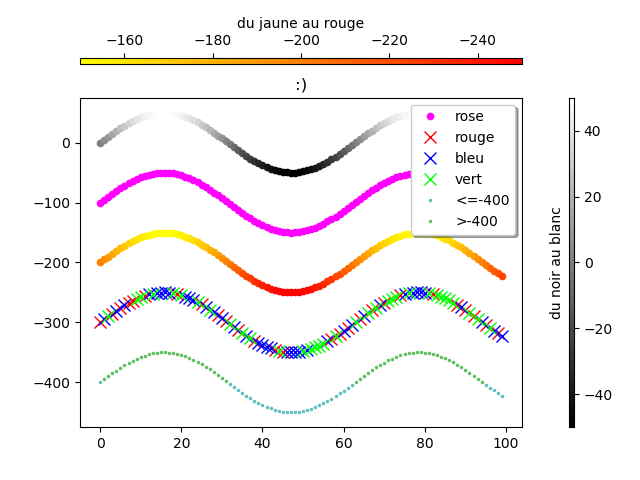

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [15]:
Plot(2, title=':)').add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10),
                        marker='.', colored_by=lambda i, xy: xy[1][i], label='du noir au blanc') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 100,
         marker='.', colored_by='#ff00ff', label='rose') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 200,
         marker='.', colored_by=lambda i, xy: xy[1][i], label='du jaune au rouge') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 300,
         marker='x', colored_by=lambda i, xy: ['#ff0000', '#00ff00', '#0000ff'][int(xy[1][i]) % 3],
         label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'}) \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 400,
         marker='.', markersize=3,
         colored_by=lambda i, xy: '>-400' if xy[1][i] > -400 else '<=-400')

<IPython.core.display.Javascript object>


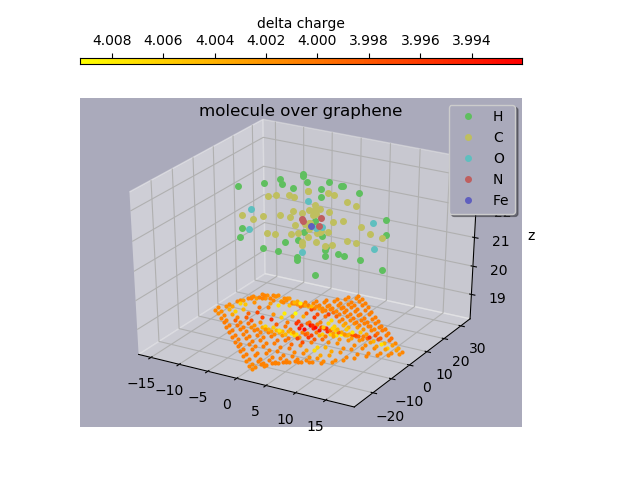

No handles with labels found to put in legend.


In [16]:
Plot(3, zlabel='z', bg_color='#aaaabb', title="molecule over graphene").magic('invert_color_bars') \
    .add(tab, 'x', 'y', 'z', first_line=101, markersize=4, marker='.',
         colored_by=lambda i, _: sum(charges[101 + i]), label='delta charge') \
    .add(tab, 'x', 'y', 'z', last_line=100
         , markersize=4, marker='o', colored_by='atom')

<IPython.core.display.Javascript object>


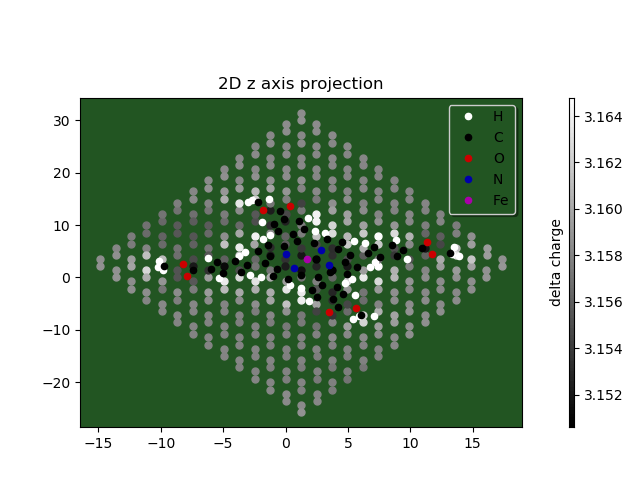

No handles with labels found to put in legend.


In [17]:
dict_atoms_colors={'H': '#ffffff', 'C':'#000000', 'N':'#0000aa', 'O':'#cc0000', 'Fe':'#aa00aa'}
dict_colors_atoms={c: a for a, c in dict_atoms_colors.items()}
Plot(2, bg_color='#225522', title="2D z axis projection") \
    .add(tab, 'x', 'y', first_line=101, markersize=10, marker='.',
         colored_by=lambda i, _: sum(charges[101 + i][1:]), label='delta charge')\
    .add(tab, 'x', 'y', last_line=100, colored_by=lambda i, xy: dict_atoms_colors[tab['atom'][i]], marker='.',
        label=dict_colors_atoms)

<IPython.core.display.Javascript object>


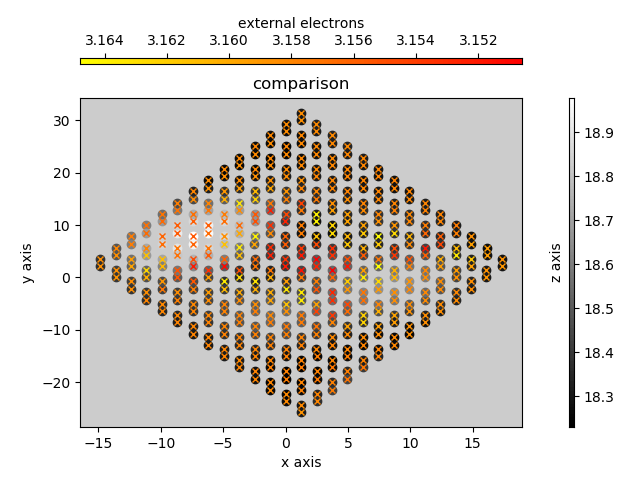

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [18]:
Plot(2, bg_color='#cccccc', xlabel="x axis", ylabel="y axis", title="comparison") \
    .add(tab, 'x', 'y', first_line=101, markersize=6, marker='o',
         colored_by=lambda i, _: tab['z'][101 + i],
         label="z axis") \
    .add(tab, 'x', 'y', first_line=101, markersize=4, marker='x',
         colored_by=lambda i, _: sum(charges[101 + i][1:]),
         label="external electrons")

C:\Applications\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


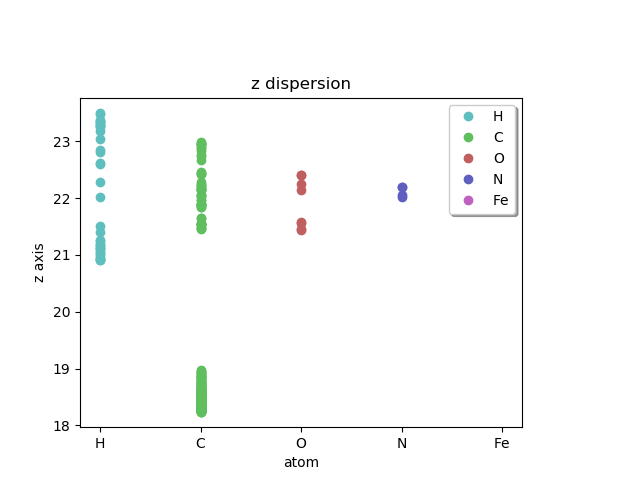

In [19]:
Plot(2, xlabel="atom", ylabel="z axis", title="z dispersion") \
    .add(tab, 'atom', 'z', markersize=6, marker='o', colored_by='atom')

C:\Applications\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


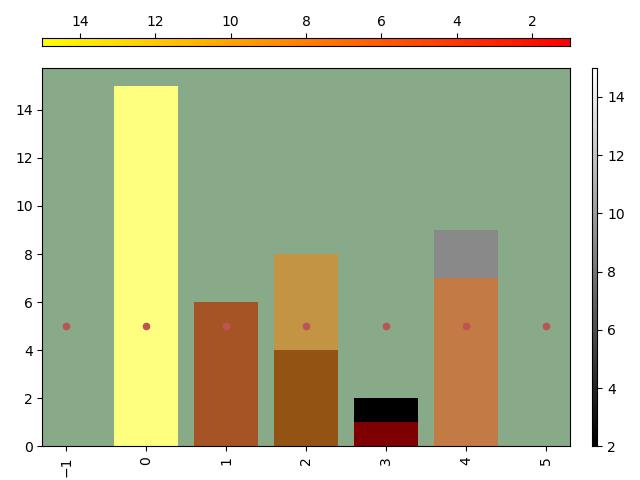

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [20]:
Plot(2, bg_color="#88aa88").add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
                                colored_by=lambda i, xy: xy[1][i]) \
    .add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
         colored_by=lambda i, xy: xy[1][i], markersize=0.5) \
    .add(x=range(-1, 6), y=[5] * 7, colored_by='#bb5555')

C:\Applications\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


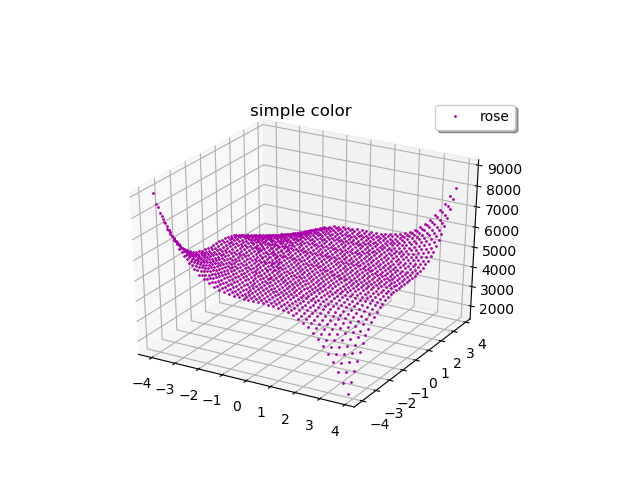

In [21]:
Plot(3, title='simple color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 5000,
         marker='.', colored_by='#aa00aa', label='rose', markersize=2) 

C:\Applications\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


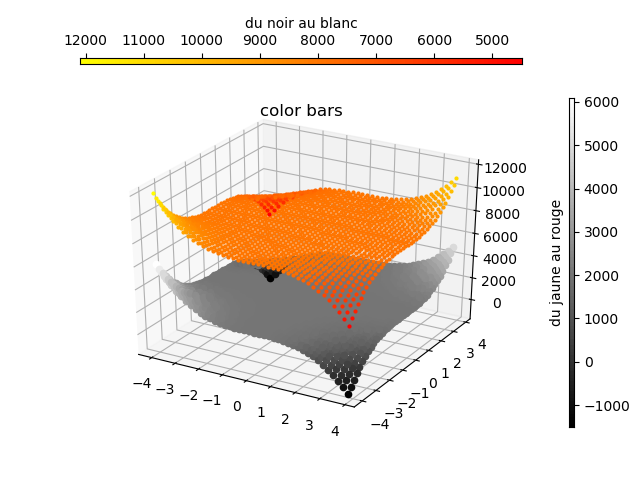

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [22]:
Plot(3, title='color bars')\
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 2000,
         marker='.', colored_by=lambda i, xy: xy[2][i], label='du jaune au rouge') \
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2),
                        z=lambda i, x, y: (x[i] * y[i]) ** 3 + 8000,
                        marker='o', colored_by=lambda i, xy: xy[2][i], label='du noir au blanc', markersize=2) 

C:\Applications\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


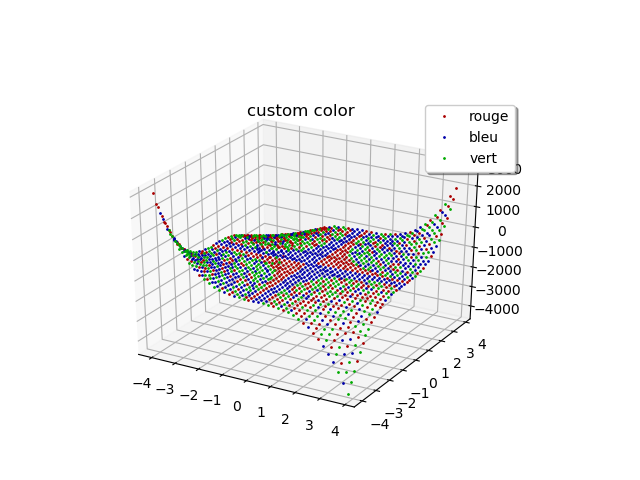

In [23]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 1000,
         marker='.', colored_by=lambda i, xy: ['#aa0000', '#00aa00', '#0000aa'][int(xy[2][i]) % 3],
         label={'#aa0000': 'rouge', '#00aa00': 'vert', '#0000aa': 'bleu'}, markersize=2) 

<IPython.core.display.Javascript object>


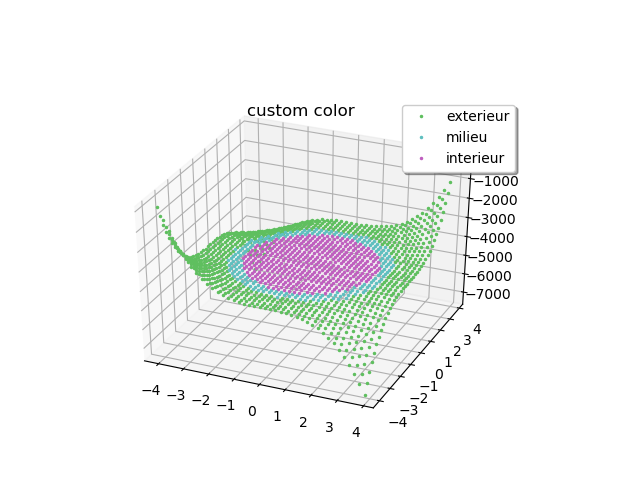

In [34]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 4000,
         marker='.', markersize=3,
         colored_by=lambda i, xy: 'exterieur' if math.sqrt(xy[0][i] ** 2 + xy[1][i] ** 2) > 3 else 
                                  'milieu' if math.sqrt(xy[0][i] ** 2 + xy[1][i] ** 2) > 2.5 else 
                                  'interieur')